In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-csse/dataset.csv


# Loading Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/ml-csse/dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Checking for Null Values**

In [4]:
null_values = df.isnull().sum()
columns_with_nulls = null_values[null_values > 0]

if not columns_with_nulls.empty:
    print("Columns with null values:")
    print(columns_with_nulls)
else:
    print("No columns contain null values.")


No columns contain null values.


**Finding which Features are Numerical and which are Categorical**

In [5]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns

print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Categorical Features:
Index([], dtype='object')


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
zero_counts = (df == 0).sum()
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Infernece**

SkinThickness
Insulin
Contain a lot of "0" values 
   
Class Imbalance Between "0" and "1"


# EDA

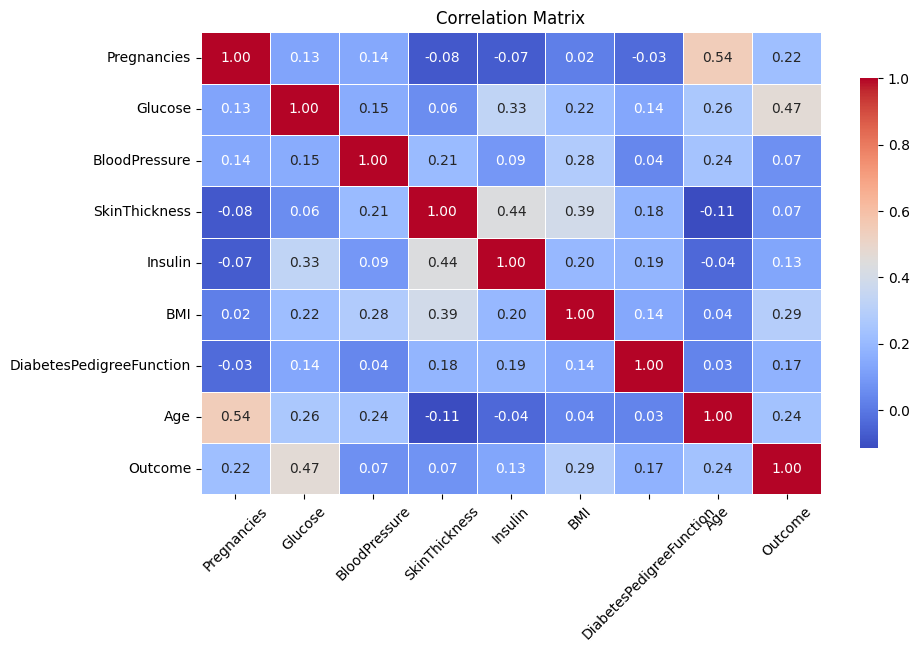

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pregnancies', ylabel='Count'>

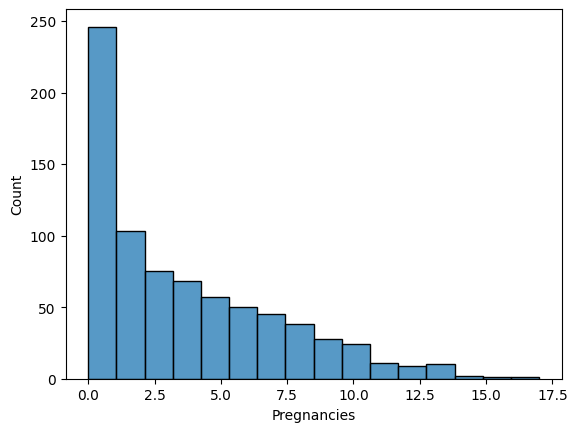

In [9]:
sns.histplot(df["Pregnancies"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Glucose', ylabel='Count'>

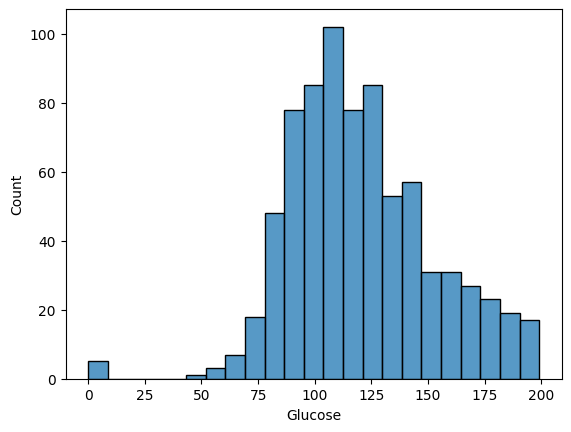

In [10]:
sns.histplot(df["Glucose"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BloodPressure', ylabel='Count'>

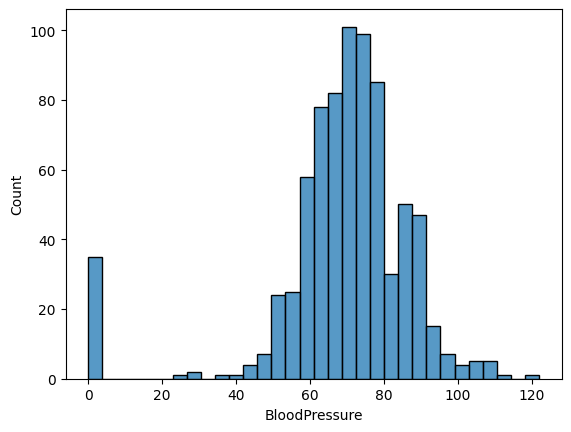

In [11]:
sns.histplot(df["BloodPressure"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SkinThickness', ylabel='Count'>

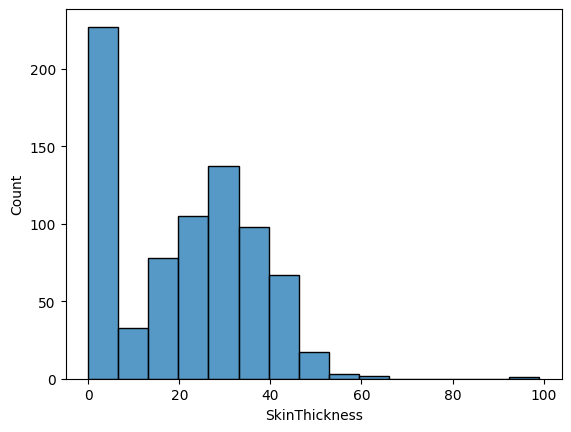

In [12]:
sns.histplot(df["SkinThickness"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Insulin', ylabel='Count'>

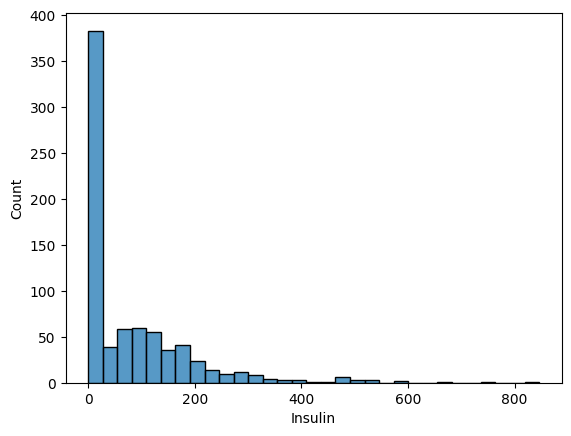

In [13]:
sns.histplot(df["Insulin"])

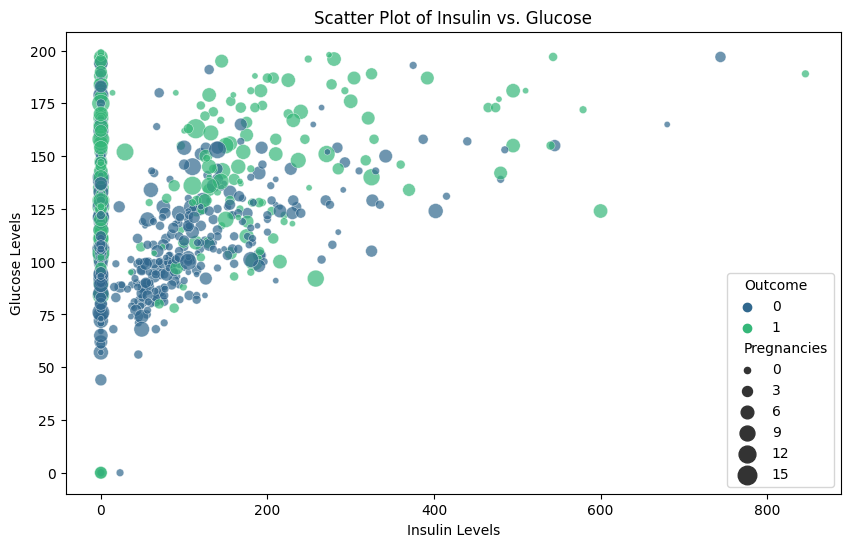

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Insulin', y='Glucose', hue='Outcome', palette='viridis', size='Pregnancies', sizes=(20, 200), alpha=0.7)

plt.title('Scatter Plot of Insulin vs. Glucose')
plt.xlabel('Insulin Levels')
plt.ylabel('Glucose Levels')

plt.show()

The Graph reveals inconsistencies in Insulin and Glucose levels:
*     Records show Insulin levels of "0" across a wide range of Glucose values, from 0 to over 200.

Physiologically, a person with a zero Insulin level would generally have elevated Glucose levels.
*     In particular, Glucose levels below 80 associated with zero Insulin are implausible.

These cases may suggest:
*     Data quality issues or potential misreported values.
*     Unusual or special cases that need further investigation

In [15]:
filtered_people = df[(df['Insulin'] == 0) & (df['Glucose'] < 80)]

# Step 2: Count the number of people matching the criteria
count = filtered_people.shape[0]

# Output the result
print("Number of people with insulin level = 0 and glucose level < 80:", count)

Number of people with insulin level = 0 and glucose level < 80: 24


Removing these 24 rows

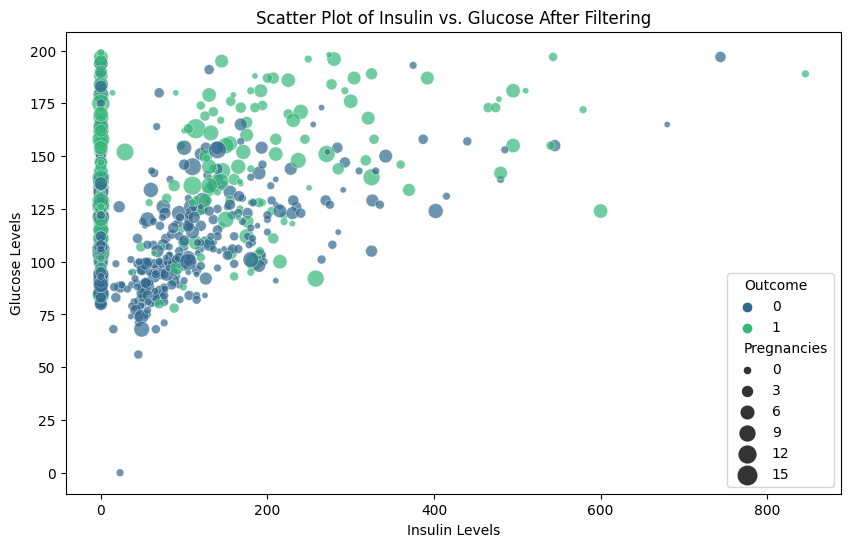

In [16]:
df = df[~((df['Glucose'] < 80) & (df['Insulin'] == 0))]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Insulin', y='Glucose', hue='Outcome', palette='viridis', size='Pregnancies', sizes=(20, 200), alpha=0.7)

plt.title('Scatter Plot of Insulin vs. Glucose After Filtering')
plt.xlabel('Insulin Levels')
plt.ylabel('Glucose Levels')

plt.show()

In [17]:
train_x = df.drop('Outcome',axis=1)
train_y = df['Outcome']

# Elbow Curves for Ideal Bining

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

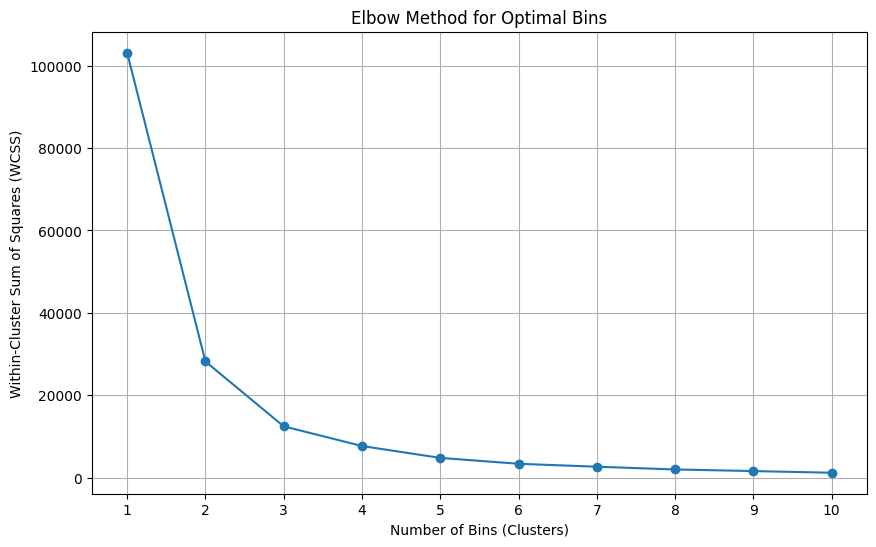

In [18]:
Age = train_x[['Age']].values

max_bins = 10 
wcss = []  
for i in range(1, max_bins + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(Age)
    wcss.append(kmeans.inertia_)
# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_bins + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Bins')
plt.xlabel('Number of Bins (Clusters)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_bins + 1))
plt.grid()
plt.show()

**Elbow at 3**


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

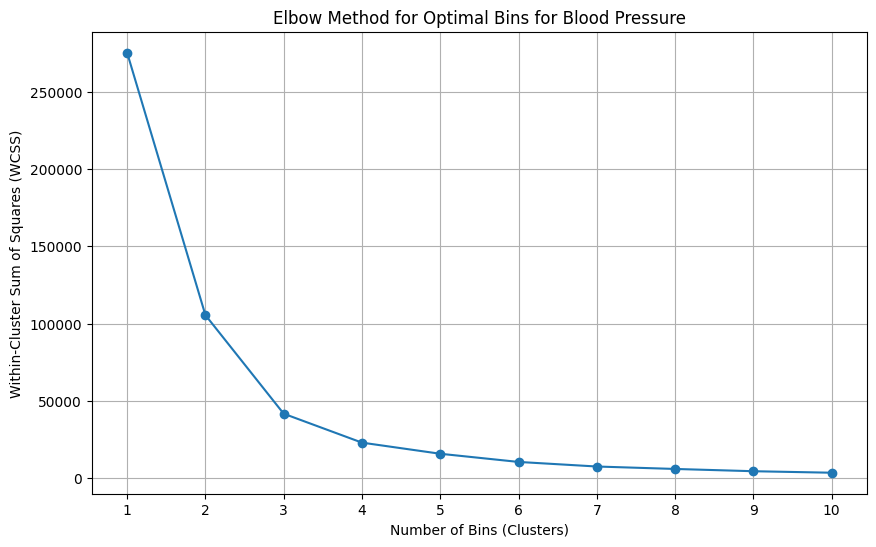

In [19]:
BloodPressure = train_x[['BloodPressure']].values  # Replace 'FeatureColumn' with your actual feature name

# Define a range for the number of clusters (bins)
max_bins = 10  # You can adjust this based on your needs
wcss = []  # List to hold the WCSS values

# Perform KMeans clustering for a range of bins
for i in range(1, max_bins + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(BloodPressure)
    wcss.append(kmeans.inertia_)  # WCSS value for the current number of clusters

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_bins + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Bins for Blood Pressure')
plt.xlabel('Number of Bins (Clusters)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_bins + 1))
plt.grid()
plt.show()

Elbow at 4

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

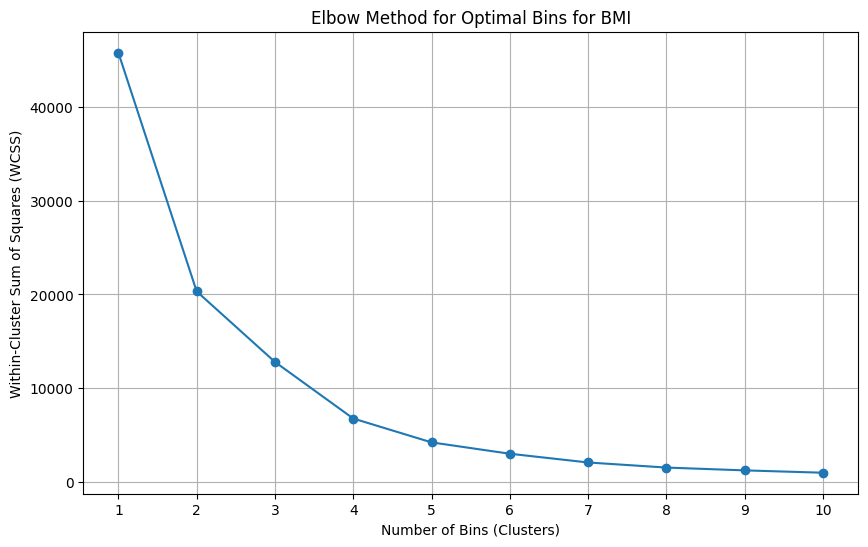

In [20]:
BMI = train_x[['BMI']].values  # Replace 'FeatureColumn' with your actual feature name

# Define a range for the number of clusters (bins)
max_bins = 10  # You can adjust this based on your needs
wcss = []  # List to hold the WCSS values

# Perform KMeans clustering for a range of bins
for i in range(1, max_bins + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(BMI)
    wcss.append(kmeans.inertia_)  # WCSS value for the current number of clusters

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_bins + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Bins for BMI')
plt.xlabel('Number of Bins (Clusters)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_bins + 1))
plt.grid()
plt.show()

Elbow at 4

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

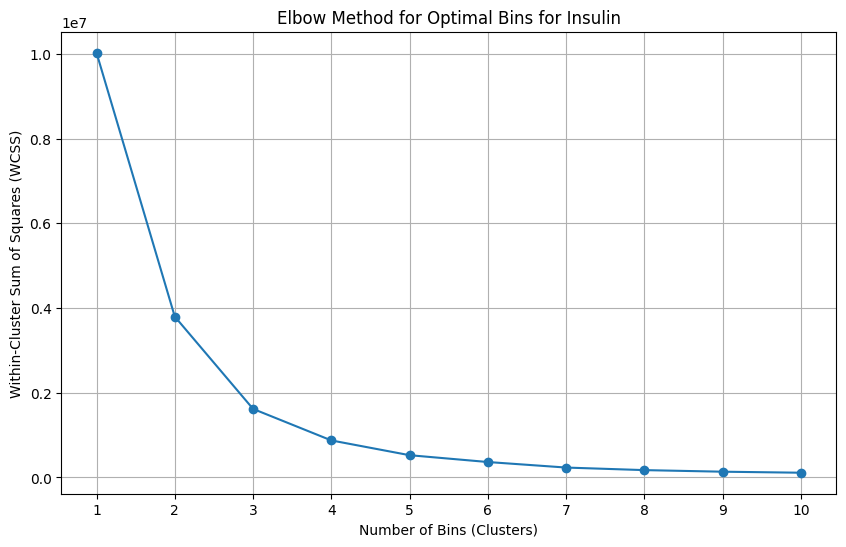

In [21]:
Insulin = train_x[['Insulin']].values  # Replace 'FeatureColumn' with your actual feature name

# Define a range for the number of clusters (bins)
max_bins = 10  # You can adjust this based on your needs
wcss = []  # List to hold the WCSS values

# Perform KMeans clustering for a range of bins
for i in range(1, max_bins + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(Insulin)
    wcss.append(kmeans.inertia_)  # WCSS value for the current number of clusters

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_bins + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Bins for Insulin')
plt.xlabel('Number of Bins (Clusters)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_bins + 1))
plt.grid()
plt.show()

Elbow at 3

# Clustering 

In [22]:
kmeans = KMeans(n_clusters=3)
train_x['Age'] = kmeans.fit_predict(Age)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
kmeans = KMeans(n_clusters=4)
train_x['BloodPressure'] = kmeans.fit_predict(BloodPressure)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
kmeans = KMeans(n_clusters=4)
train_x['BMI'] = kmeans.fit_predict(BMI)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
kmeans = KMeans(n_clusters=3)
train_x['Insulin'] = kmeans.fit_predict(Insulin)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Scaling

In [26]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=train_x.columns)
train_x_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.644693,0.836869,-0.990160,0.893537,-0.722297,-0.827511,0.454166,1.871656
1,-0.843060,-1.266725,-0.990160,0.516386,-0.722297,0.099700,-0.371651,0.244890
2,1.239794,2.005532,0.613059,-1.306511,-0.722297,0.099700,0.588810,0.244890
3,-0.843060,-1.133164,-0.990160,0.139235,0.983699,0.099700,-0.922195,0.244890
4,-1.140610,0.469575,0.613059,0.893537,0.983699,1.954122,5.424028,-1.381877


# Model Training

In [27]:
# Split the data into training and testing sets (80% train, 20% test by default)
X_train, X_test, y_train, y_test = train_test_split(train_x_scaled, train_y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7987
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       102
           1       0.73      0.57      0.64        47

    accuracy                           0.80       149
   macro avg       0.78      0.74      0.75       149
weighted avg       0.79      0.80      0.79       149



Using GridSearch to Hypertune Logestic Regression Hyperparameters

In [28]:
# Define the model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l1', 'l2']          # Type of regularization
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test)

# Evaluate model performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Best Cross-Validation Accuracy: 0.7394957983193278
Test Accuracy: 0.8187919463087249
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       102
           1       0.76      0.62      0.68        47

    accuracy                           0.82       149
   macro avg       0.80      0.76      0.78       149
weighted avg       0.81      0.82      0.81       149



In [29]:
# Split the data into training and testing sets (80% train, 20% test by default)
X_train, X_test, y_train, y_test = train_test_split(train_x_scaled, train_y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8188
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       102
           1       0.76      0.62      0.68        47

    accuracy                           0.82       149
   macro avg       0.80      0.76      0.78       149
weighted avg       0.81      0.82      0.81       149

